In [1]:
import sys
import os
import numpy as np
import sympy as sp

# Add the parent directory and src directory to Python path
project_root = os.path.dirname(os.getcwd())
src_path = os.path.join(project_root, 'src')
sys.path.insert(0, project_root)
sys.path.insert(0, src_path)

# First import matrix_utils to make it available for seesaw module
#import matrix_utils

# Now we need to temporarily fix the import issue by importing functions into global namespace
from matrix_utils import (diagonalize_mass_matrix, mass_squared_differences,
                          create_symbolic_matrix, seesaw_approximation_symbolic,
                          substitute_numerical_values, symbolic_rotation_matrix,
                          sin_cos_from_tan_fraction)

# Add these to matrix_utils module namespace to satisfy relative imports
sys.modules['matrix_utils'].diagonalize_mass_matrix = diagonalize_mass_matrix
sys.modules['matrix_utils'].mass_squared_differences = mass_squared_differences
sys.modules['matrix_utils'].create_symbolic_matrix = create_symbolic_matrix
sys.modules['matrix_utils'].seesaw_approximation_symbolic = seesaw_approximation_symbolic
sys.modules['matrix_utils'].substitute_numerical_values = substitute_numerical_values
sys.modules['matrix_utils'].symbolic_rotation_matrix = symbolic_rotation_matrix
sys.modules['matrix_utils'].sin_cos_from_tan_fraction = sin_cos_from_tan_fraction

# Now import seesaw with absolute imports instead of relative
exec(open(os.path.join(src_path, 'seesaw.py')).read().replace('from .matrix_utils import', 'from matrix_utils import'))

print("Successfully loaded SymbolicSeesawTypeI!")
print(f"Available methods: {[method for method in dir(SymbolicSeesawTypeI) if not method.startswith('_')]}")

Successfully loaded SymbolicSeesawTypeI!
Available methods: ['MConjugateMT', 'MDaggerM', 'charpoly_relations', 'evaluate_numerically', 'full_mass_matrix_symbolic', 'left_eigenvectors', 'light_mass_matrix_symbolic', 'neutrino_mass_differences_dummyes', 'perturbative_expansion', 'right_eigenvectors', 'scaling_analysis', 'set_texture', 'simplified_2x2_case']


In [2]:
from sympy import init_printing, symbols, solve, sin, cos, factor, Matrix, conjugate, I, sqrt, tan, Dummy
from sympy.physics.quantum import Dagger
init_printing()

# Two left neutrinos and one right handed neutrino

In [3]:
seesaw31 = SymbolicSeesawTypeI(n_generations=3, n_sterile=1)
seesaw31

SymbolicSeesawTypeI(n_generations=3, n_sterile=1)

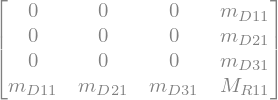

In [4]:
Mnu31 = seesaw31.full_mass_matrix_symbolic()
Mnu31

In [5]:
Mnu31.rank()

In [6]:
charpoly_relations = seesaw31.charpoly_relations()


In [7]:
mn = seesaw31.masses
mn

In [8]:
charpoly_relations['char_poly_M']

In [9]:
charpoly_relations['char_poly_diag'].subs(mn[0], 0).subs(mn[1], 0)

In [10]:
eqs_charpoly = [
    charpoly_relations['coefficients_full_matrix'][key] 
    - charpoly_relations['coefficients_diagonal'][key].expand().subs(mn[0], 0).subs(mn[1], 0)
    for key in charpoly_relations['coefficients_full_matrix']
]
eqs_charpoly

In [11]:
r = symbols('r')
th = symbols('theta', real=True)
phi = symbols(r'\varphi', real=True)

seesaw_parameters_spheric = {
    seesaw31.m_D_sym[0, 0]: r * sin(th)* cos(phi),
    seesaw31.m_D_sym[1, 0]: r * sin(th)* sin(phi),
    seesaw31.m_D_sym[2, 0]: r * cos(th)
}
(seesaw31.m_D_sym[0, 0]**2 + seesaw31.m_D_sym[1, 0]**2 + seesaw31.m_D_sym[2, 0]**2).subs(
    seesaw_parameters_spheric
).trigsimp()

In [111]:
r_masses = I*sqrt(mn[2])*sqrt(mn[3])
r_masses, r_masses**2

In [112]:
seesaw_parameters_spheric_masses = {
    seesaw31.m_D_sym[0, 0]: r_masses * sin(th)* cos(phi),
    seesaw31.m_D_sym[1, 0]: r_masses * sin(th)* sin(phi),
    seesaw31.m_D_sym[2, 0]: r_masses * cos(th)
}
seesaw_parameters_spheric_masses

In [113]:
seesaw_parameters_spheric_masses[seesaw31.M_R_sym[0, 0]] = solve(eqs_charpoly[3], seesaw31.M_R_sym[0, 0])[0]

In [114]:
seesaw_parameters_spheric_masses

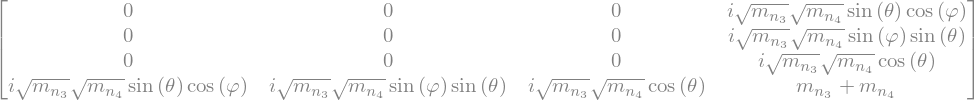

In [151]:
Mnu31_spheric = Mnu31.subs(seesaw_parameters_spheric_masses)
Mnu31_spheric

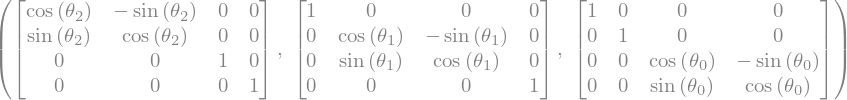

In [116]:
th0, th1, th2 = symbols(r'\theta_{0}, \theta_{1}, \theta_{2}', real=True)
Rth2 = symbolic_rotation_matrix(dim=4, axis=2, angle=th0)
Rth1 = symbolic_rotation_matrix(dim=4, axis=1, angle=th1)
Rth0 = symbolic_rotation_matrix(dim=4, axis=0, angle=th2)
Rth0, Rth1, Rth2

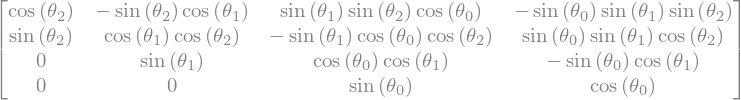

In [117]:
R = Rth0*Rth1*Rth2
R

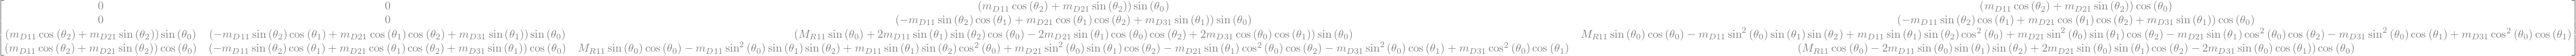

In [118]:
Mnu31_diag = (R.T*Mnu31*R).applyfunc(lambda x:x.factor())
Mnu31_diag

In [119]:
Mnu31_diag[0, 2]

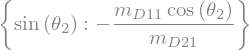

In [120]:
sinth2_sol = solve(Mnu31_diag[0, 2], sin(th2), dict=True)[0]
sinth2_sol

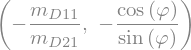

In [155]:
tanth2 = sinth2_sol[sin(th2)]/cos(th2)
tanth2, tanth2.subs(seesaw_parameters_spheric_masses)

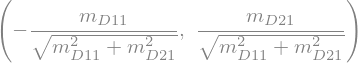

In [122]:
sinth2, costh2 = sin_cos_from_tan_fraction(tanth2)
sinth2, costh2 

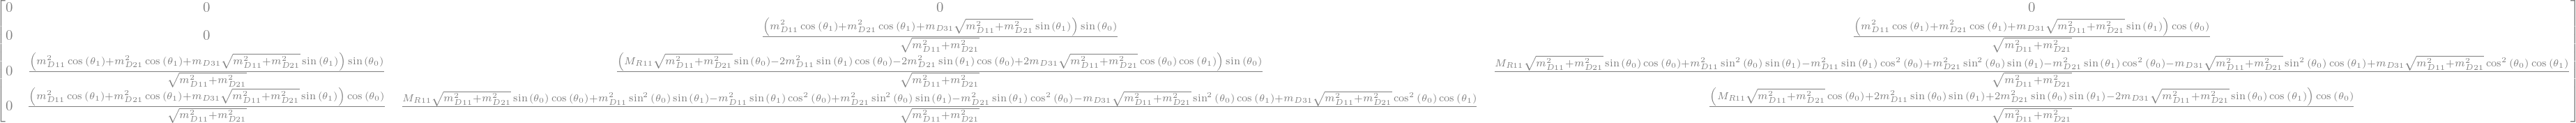

In [123]:
Mnu31_diag_th01 = Mnu31_diag.subs(
    {
        sin(th2): sinth2,
        cos(th2): costh2
    }
).applyfunc(lambda x:x.factor())
Mnu31_diag_th01

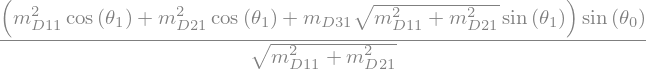

In [124]:
Mnu31_diag_th01[1,2]

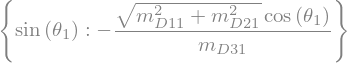

In [125]:
sinth1_sol = solve(Mnu31_diag_th01[1, 2], sin(th1), dict=True)[0]
sinth1_sol

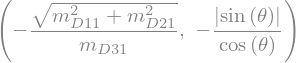

In [157]:
tanth1 = sinth1_sol[sin(th1)]/cos(th1)
tanth1, tanth1.subs(seesaw_parameters_spheric_masses).trigsimp()

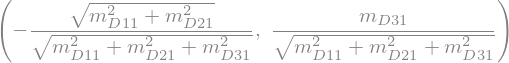

In [127]:
sinth1, costh1 = sin_cos_from_tan_fraction(tanth1)
sinth1, costh1

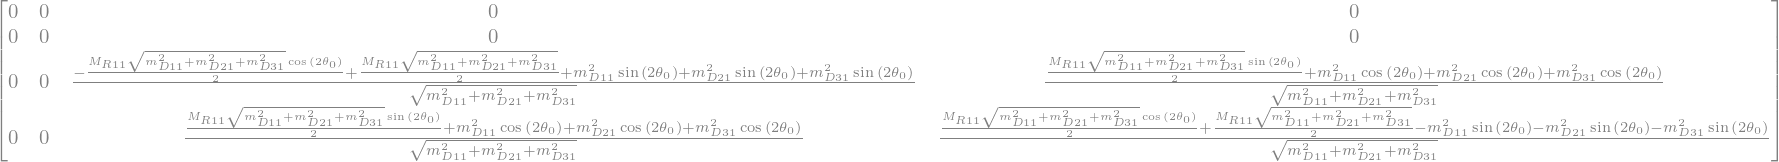

In [128]:
Mnu31_diag_th0 = Mnu31_diag_th01.subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1
    }
).applyfunc(lambda x:x.factor().trigsimp())
Mnu31_diag_th0

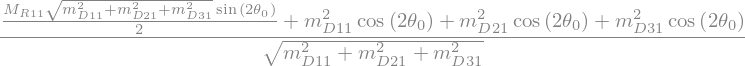

In [129]:
Mnu31_diag_th0[2, 3]

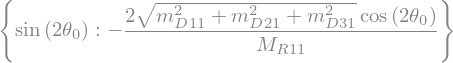

In [130]:
sin2th0_sol = solve(Mnu31_diag_th0[2, 3], sin(2*th0), dict=True)[0]
sin2th0_sol

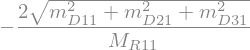

In [131]:
tan2th0 = sin2th0_sol[sin(2*th0)]/cos(2*th0)
tan2th0

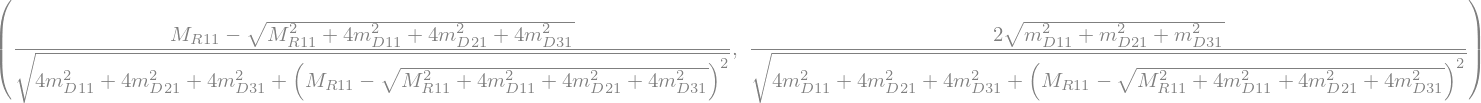

In [132]:
sin2th0, cos2th0 = sin_cos_from_tan_fraction(tan2th0)
#display(sin2th, cos2th)
tanth0 = ((1 - cos2th0)/sin2th0).factor()
sinth0, costh0 = sin_cos_from_tan_fraction(tanth0)
sinth0, costh0

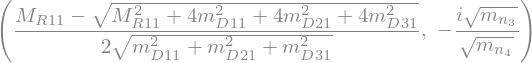

In [159]:
tanhth0 = sinth0/costh0
tanhth0, tanth0.subs(seesaw_parameters_spheric_masses).trigsimp().trigsimp().subs(dummy_differences).simplify().subs(
        {value:key for key, value in dummy_differences.items()}
    ).factor()

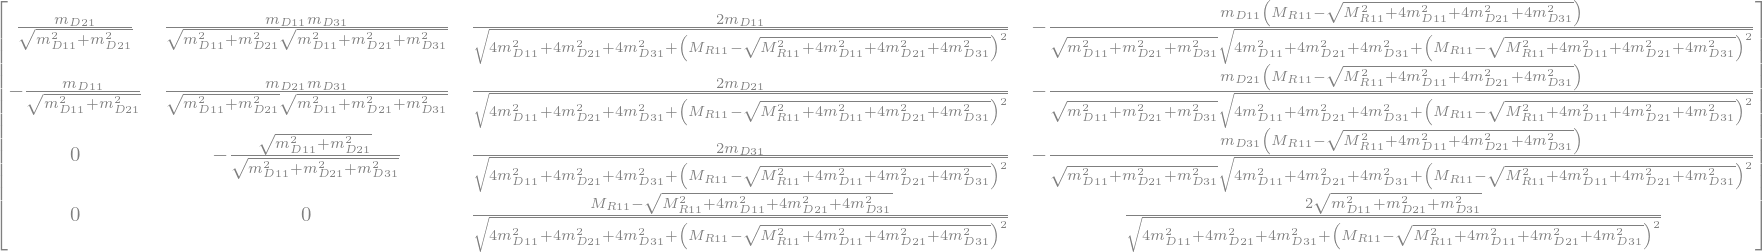

In [133]:
Rth_seesaw = R.subs(
    {
        sin(th2):sinth2,
        cos(th2):costh2
    }
).subs(
    {
        sin(th1):sinth1,
        cos(th1):costh1
    }
).subs(
    {
        sin(th0):sinth0,
        cos(th0):costh0
    }
)
Rth_seesaw

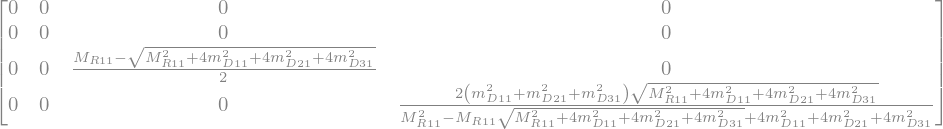

In [134]:
Mnu31_masses = (Rth_seesaw.T*Mnu31*Rth_seesaw).applyfunc(lambda x:x.factor())
Mnu31_masses

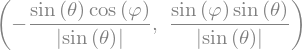

In [135]:
sinth2_masses = sinth2.subs(seesaw_parameters_spheric_masses).factor(deep=True).trigsimp()
costh2_masses = costh2.subs(seesaw_parameters_spheric_masses).factor(deep=True).trigsimp()
sinth2_masses, costh2_masses

In [136]:
sinth1_masses = sinth1.subs(seesaw_parameters_spheric_masses).factor(deep=True).trigsimp()
costh1_masses = costh1.subs(seesaw_parameters_spheric_masses).factor(deep=True).trigsimp()
sinth1_masses, costh1_masses

In [137]:
dummy_differences = seesaw31.neutrino_mass_differences_dummyes()
dummy_differences

In [138]:
term = -4*mn[3]

In [140]:
seesaw_parameters_spheric_masses

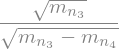

In [143]:
sinth0_masses = sinth0.subs(seesaw_parameters_spheric_masses).factor(deep=True).trigsimp().subs(dummy_differences).simplify().subs(
        {value:key for key, value in dummy_differences.items()}
    ).factor()
sinth0_masses

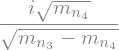

In [146]:
costh0_masses = costh0.subs(seesaw_parameters_spheric_masses).factor(deep=True).trigsimp().subs(dummy_differences).simplify().subs(
        {value:key for key, value in dummy_differences.items()}
    ).factor()
costh0_masses

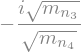

In [147]:
tanth0_masses = sinth0_masses/costh0_masses
tanth0_masses

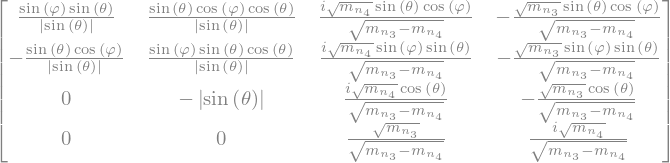

In [148]:
Rth_seesaw2 = R.subs(
    {
        sin(th2):sinth2_masses,
        cos(th2):costh2_masses
    }
).subs(
    {
        sin(th1):sinth1_masses,
        cos(th1):costh1_masses
    }
).subs(
    {
        sin(th0):sinth0_masses,
        cos(th0):costh0_masses
    }
)
Rth_seesaw2

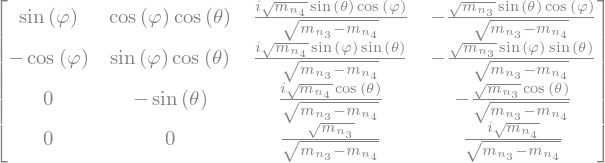

In [160]:
Rth_seesaw2.subs(abs(sin(th)), sin(th))

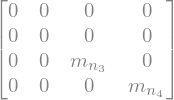

In [152]:
Mnu31_masses_spheric = (Rth_seesaw2.T*Mnu31_spheric*Rth_seesaw2).applyfunc(
    lambda x:x.factor().trigsimp().subs(dummy_differences).simplify().subs(
        {value:key for key, value in dummy_differences.items()}
    ).factor()
)
Mnu31_masses_spheric